<!-- WARNING: THIS FILE WAS AUTOGENERATED! DO NOT EDIT! -->

## Base class

In [1]:
#| echo: false
#| output: asis
show_doc(STTDataset)

---

[source](https://github.com/slegroux/nimrod/blob/main/nimrod/data/datasets.py#L191){target="_blank" style="float:right; font-size:smaller"}

### STTDataset

>      STTDataset (tokenizer:lhotse.dataset.collation.TokenCollater,
>                  num_mel_bins:int=80)

An abstract class representing a :class:`Dataset`.

All datasets that represent a map from keys to data samples should subclass
it. All subclasses should overwrite :meth:`__getitem__`, supporting fetching a
data sample for a given key. Subclasses could also optionally overwrite
:meth:`__len__`, which is expected to return the size of the dataset by many
:class:`~torch.utils.data.Sampler` implementations and the default options
of :class:`~torch.utils.data.DataLoader`.

.. note::
  :class:`~torch.utils.data.DataLoader` by default constructs a index
  sampler that yields integral indices.  To make it work with a map-style
  dataset with non-integral indices/keys, a custom sampler must be provided.

|    | **Type** | **Default** | **Details** |
| -- | -------- | ----------- | ----------- |
| tokenizer | TokenCollater |  | text tokenizer |
| num_mel_bins | int | 80 | number of mel spectrogram bins |

## LibriSpeech DataModule

In [2]:
#| echo: false
#| output: asis
show_doc(LibriSpeechDataModule)

---

[source](https://github.com/slegroux/nimrod/blob/main/nimrod/data/datasets.py#L208){target="_blank" style="float:right; font-size:smaller"}

### LibriSpeechDataModule

>      LibriSpeechDataModule (target_dir='/data/en',
>                             dataset_parts='mini_librispeech',
>                             output_dir='../recipes/stt/librispeech/data',
>                             num_jobs=1)

A DataModule standardizes the training, val, test splits, data preparation and transforms. The main
advantage is consistent data splits, data preparation and transforms across models.

Example::

    class MyDataModule(LightningDataModule):
        def __init__(self):
            super().__init__()
        def prepare_data(self):
            # download, split, etc...
            # only called on 1 GPU/TPU in distributed
        def setup(self, stage):
            # make assignments here (val/train/test split)
            # called on every process in DDP
        def train_dataloader(self):
            train_split = Dataset(...)
            return DataLoader(train_split)
        def val_dataloader(self):
            val_split = Dataset(...)
            return DataLoader(val_split)
        def test_dataloader(self):
            test_split = Dataset(...)
            return DataLoader(test_split)
        def teardown(self):
            # clean up after fit or test
            # called on every process in DDP

|    | **Type** | **Default** | **Details** |
| -- | -------- | ----------- | ----------- |
| target_dir | str | /data/en | where data will be saved / retrieved |
| dataset_parts | str | mini_librispeech | either full librispeech or mini subset |
| output_dir | str | ../recipes/stt/librispeech/data | where to save manifest |
| num_jobs | int | 1 | num_jobs depending on number of cpus available |

## Usage

In [ ]:
dm = LibriSpeechDataModule(
    target_dir="../data/en", 
    dataset_parts="mini_librispeech",
    output_dir="../data/en/LibriSpeech/dev-clean-2",
    num_jobs=1
)

In [ ]:
# skip this at export time to not waste time
# download
# dm.prepare_data()

In [ ]:
dm.setup(stage='test')

Dataset parts: 100%|██████████| 1/1 [00:00<00:00, 31.98it/s]


In [ ]:
recs = RecordingSet.from_file("../data/en/LibriSpeech/dev-clean-2/librispeech_recordings_dev-clean-2.jsonl.gz")
sup = SupervisionSet("../data/en/LibriSpeech/dev-clean-2/librispeech_supervisions_dev-clean-2.jsonl.gz")
print(len(recs),len(sup))

25 80


In [ ]:
test_dl = dm.test_dataloader()
b = next(iter(test_dl))
print(b["feats_pad"].shape, b["tokens_pad"].shape, b["ilens"].shape)
# plt.imshow(b["feats_pad"][0].transpose(0,1), origin='lower')

# dm.tokenizer.idx2token(b["tokens_pad"][0])
# dm.tokenizer.inverse(b["tokens_pad"][0], b["ilens"][0])

torch.Size([1, 1113, 80]) torch.Size([1, 163]) torch.Size([1])


CutSet(len=25) [underlying data type: <class 'dict'>]


<AxesSubplot: >

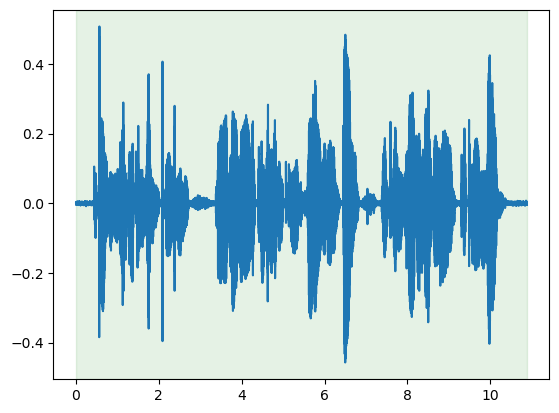

In [ ]:
print(dm.cuts_test)
cut = dm.cuts_test[0]
# pprint(cut.to_dict())
cut.plot_audio()